# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '../../../../notebooks/' not in sys.path:
    sys.path.append('../../../../notebooks/')
if 'src' not in sys.path:
    sys.path.insert(0, 'src')

from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from base.base_models import BaseModel
from base.benchmark_dataset import BenchmarkDataset
from base.model_creator import Optimizer
from base.model_evaluator import DataSource, DataPredSelection
from m_utils.mtl_approach import MTLApproach
from m_utils.constants import ICAO_REQ, MNIST_TASK

 ==> Restrict GPU memory growth: True


# Start Network runner

In [3]:
kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'train_mobilenet_mnist',
        'description': 'Training MTL network for MNIST tasks with Handcrafted 1 network architecture',
        'tags': ['mtl', 'handcrafted_1', 'mnist', 'benchmark', 'custom'],
        'src_files': ["src"]
    },
    'properties': {
        'approach': MTLApproach.HAND_1,
        'benchmarking': {
            'use_benchmark_data': True,
            'benchmark_dataset': BenchmarkDataset.MNIST,
            'tasks': list(MNIST_TASK)
        },
        'icao_data': {
            'icao_gt': {
                'use_gt_data': False,
                'gt_names': {
                    'train_validation': [],
                    'test': [],
                    'train_validation_test': [GTName.FVC]
                },
            },
            'icao_dl': {
                'use_dl_data': False,
                'tagger_model': None
            },
            'reqs': list(ICAO_REQ),
            'aligned': True,
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'exec_nas': False,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.CUSTOM,
        'batch_size': 32,
        'n_epochs': 20,
        'early_stopping': 50,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    },
    'nas_params': {}
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 87943
Process ID: 238813
---------------------------
-----
Use Neptune:  True
-----
-------------------
Args: 
{'exp_params': {'description': 'Training MTL network for MNIST tasks with '
                               'Handcrafted 1 network architecture',
                'name': 'train_mobilenet_mnist',
                'src_files': ['src'],
                'tags': ['mtl',
                         'handcrafted_1',
                         'mnist',
                         'benchmark',
                         'custom']},
 'nas_params': {},
 'net_train_params': {'base_model': <BaseModel.CUSTOM: {'name': 'custom', 'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7f8277551b80>}>,
                      'batch_size': 32,
                      'dropout': 0.3,
                      'early_stopping': 50,
                      'learning_rate': 0.001,
          

# Load Data

In [4]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
TrainData.shape: (48000, 11)
ValidationData.shape: (12000, 11)
TestData.shape: (10000, 11)
Data loaded


# Sampling Training Data

In [5]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


# Data Balancing

In [6]:
runner.balance_input_data()

-------------------- balance input data -------------------
Not balancing input_data


# Data Generators

In [7]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 48000 validated image filenames.
Found 12000 validated image filenames.
Found 10000 validated image filenames.
TOTAL: 70000

Logging class indices
 .. MTL model not logging class indices!

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Setup Experiment

In [8]:
runner.setup_experiment()

-------------------- create experiment -------------------
Setup neptune properties and parameters
Properties and parameters setup done!


# Labels Distribution

In [9]:
runner.summary_labels_dist()

-------------------- summary labels dist -------------------
Using benchmark data. Not doing summary_labels_dist()


# Create Model

In [10]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Vizualize Model

-------------------- vizualize model -------------------


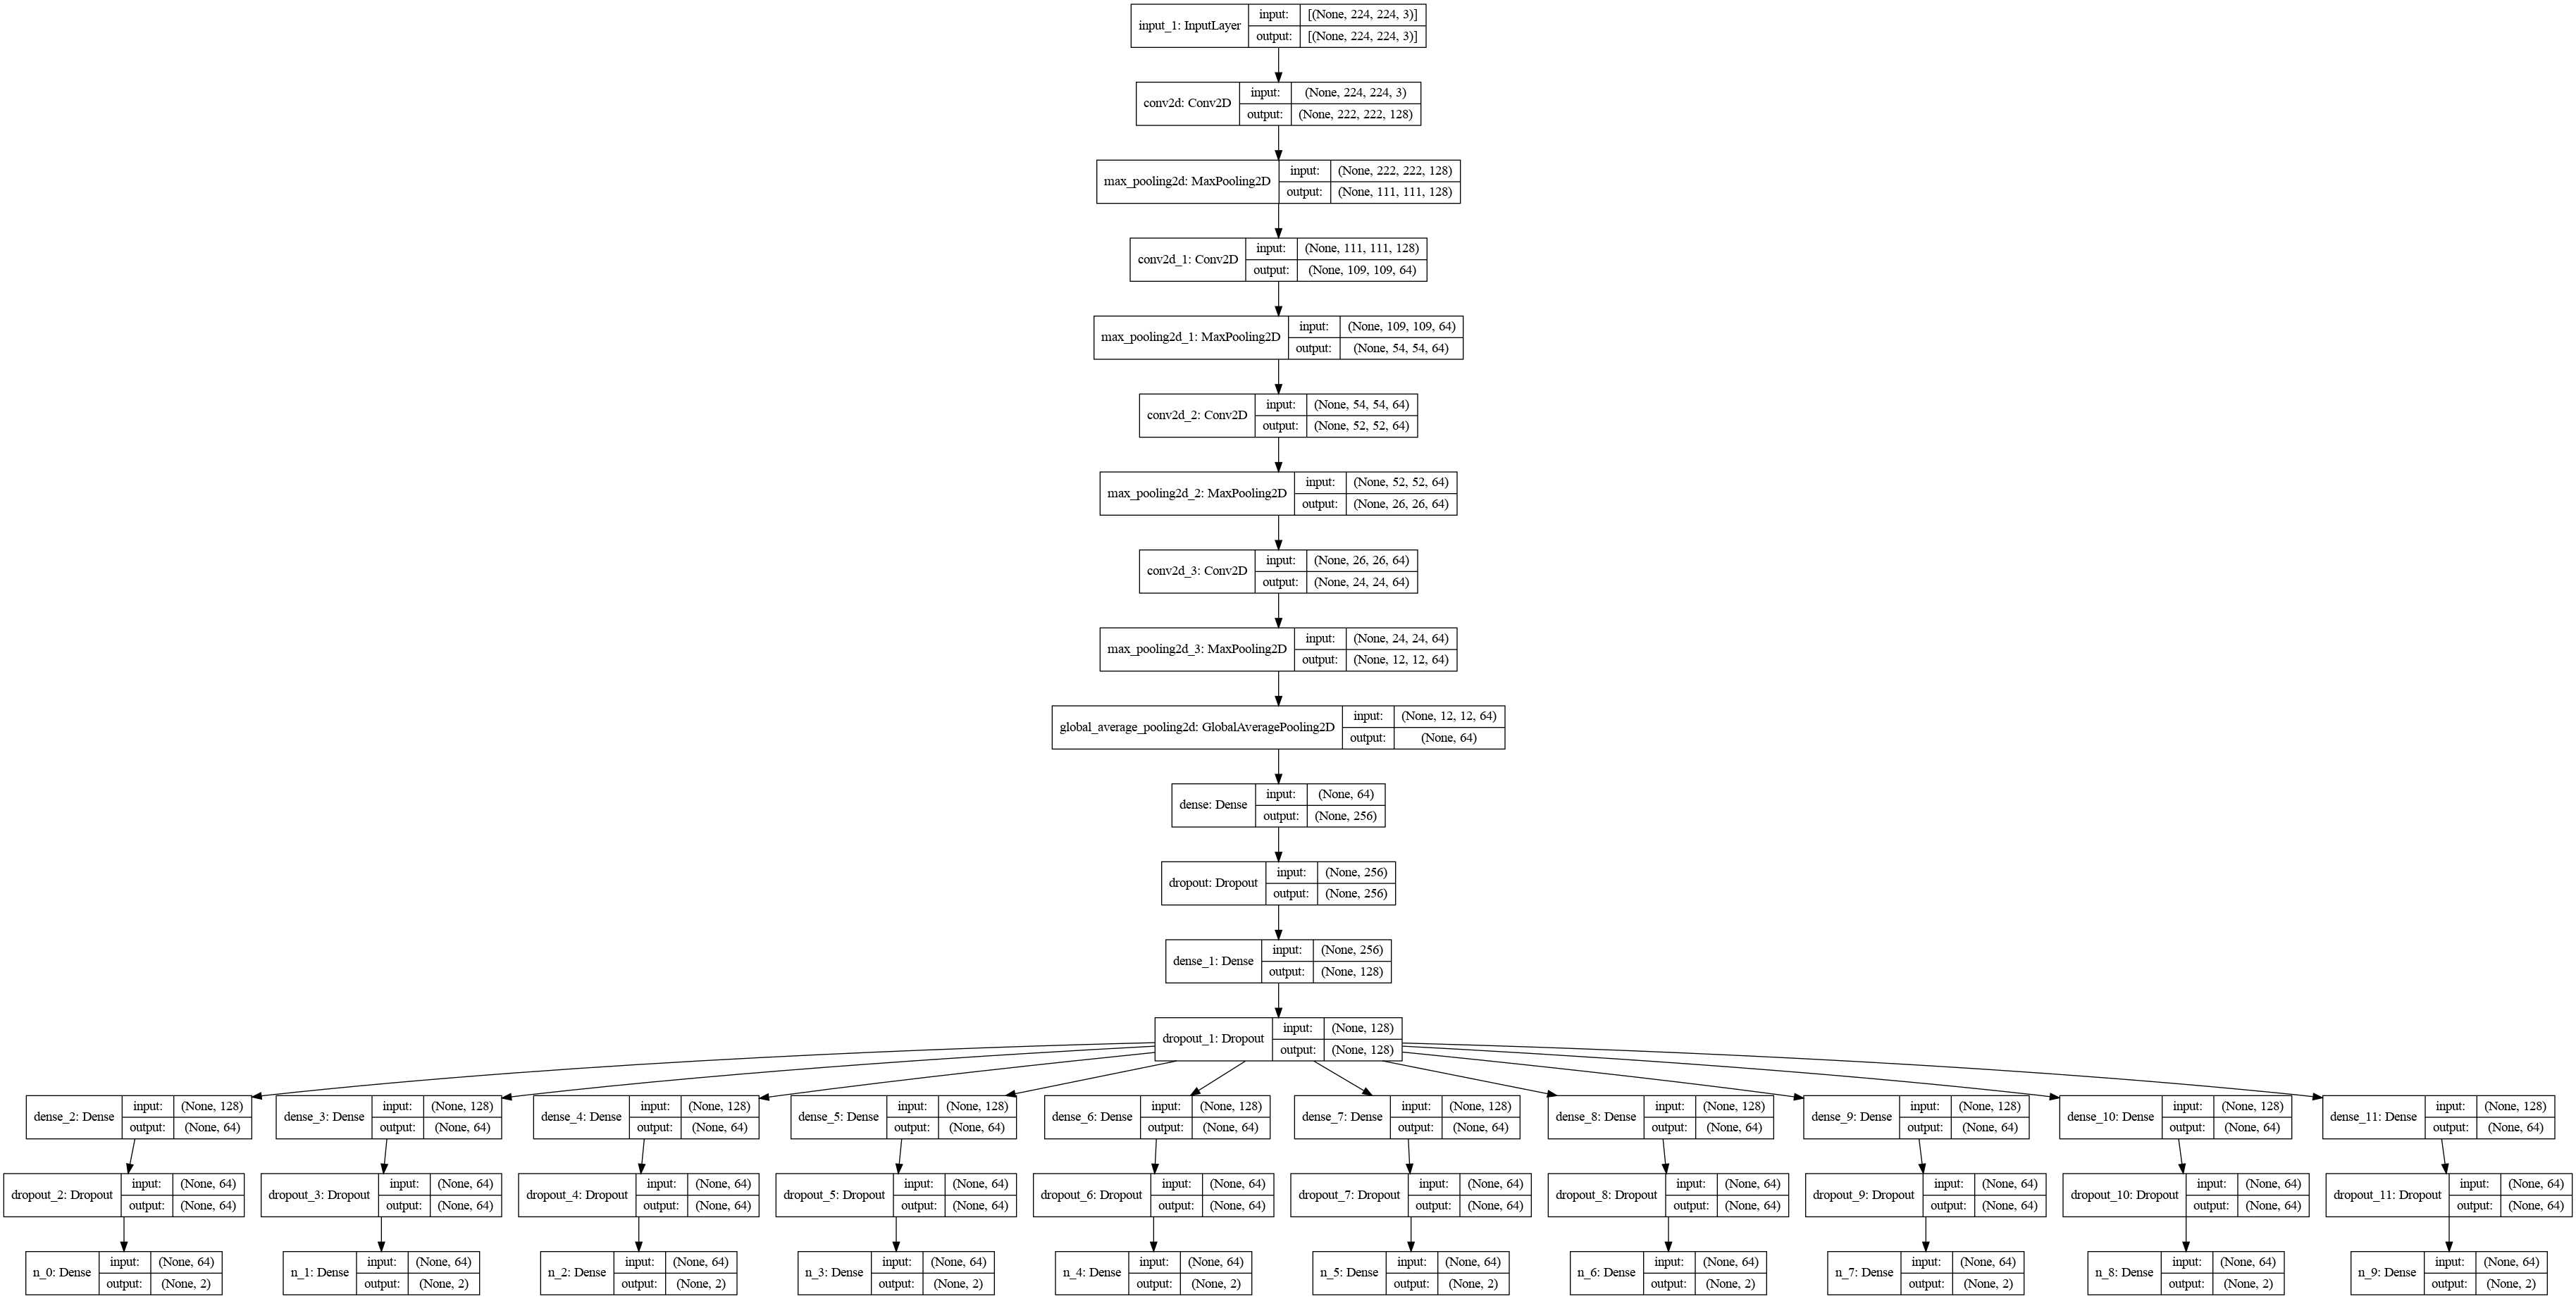

In [11]:
runner.visualize_model(outfile_path=f"figs/handcrafted_mtl_model_1_mnist.png")

In [12]:
runner.model_summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 222, 222, 128 3584        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 111, 111, 128 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 109, 109, 64) 73792       max_pooling2d[0][0]              
______________________________________________________________________________________________

# Training Model

In [13]:
runner.train_model()

-------------------- train model -------------------
Training CUSTOM network
 .. Not fine tuning base model...
  .. Total params: 284,628
  .. Trainable params: 133,396
  .. Non-trainable params: 151,232
Epoch 1/20
1500/1500 [==============================] - 121s 77ms/step - loss: 0.3363 - n_0_loss: 0.3346 - n_1_loss: 0.3619 - n_2_loss: 0.3342 - n_3_loss: 0.3413 - n_4_loss: 0.3304 - n_5_loss: 0.3161 - n_6_loss: 0.3331 - n_7_loss: 0.3455 - n_8_loss: 0.3310 - n_9_loss: 0.3353 - n_0_accuracy: 0.9010 - n_1_accuracy: 0.8877 - n_2_accuracy: 0.9005 - n_3_accuracy: 0.8979 - n_4_accuracy: 0.9029 - n_5_accuracy: 0.9094 - n_6_accuracy: 0.9016 - n_7_accuracy: 0.8958 - n_8_accuracy: 0.9026 - n_9_accuracy: 0.9006 - val_loss: 0.3270 - val_n_0_loss: 0.3195 - val_n_1_loss: 0.3560 - val_n_2_loss: 0.3213 - val_n_3_loss: 0.3302 - val_n_4_loss: 0.3288 - val_n_5_loss: 0.3028 - val_n_6_loss: 0.3246 - val_n_7_loss: 0.3439 - val_n_8_loss: 0.3210 - val_n_9_loss: 0.3215 - val_n_0_accuracy: 0.9026 - val_n_1_accu

# Plots

-------------------- draw training history -------------------


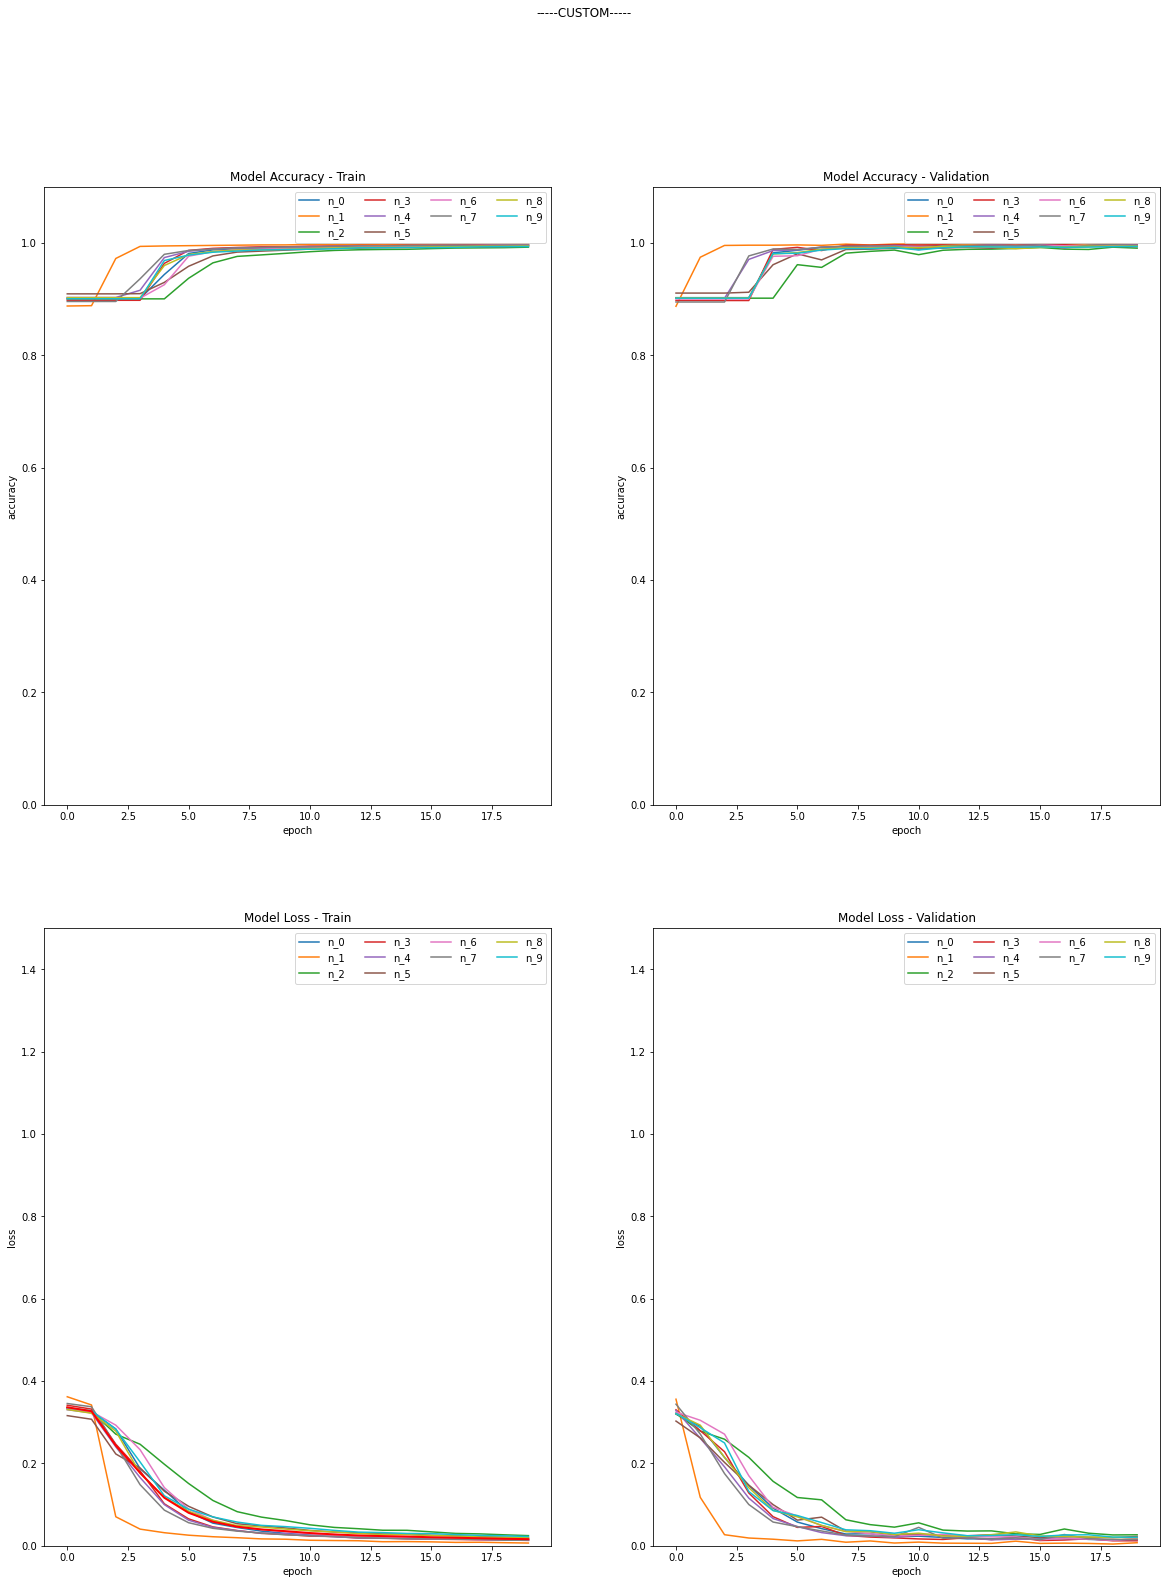

In [14]:
runner.draw_training_history()

# Load Best Model

In [15]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [16]:
runner.save_model()

-------------------- save model -------------------
Saving model
INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving model to neptune
 ..Uploading file trained_model.zip
Model saved into Neptune
Saving process finished


# Test Trained Model

## Validation Split

Testing Trained Model
Predicting labels....
375/375 [==============================] - 13s 34ms/step
Prediction finished!
Task: N_0


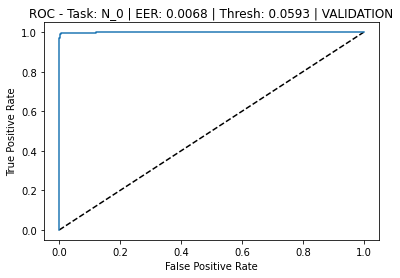

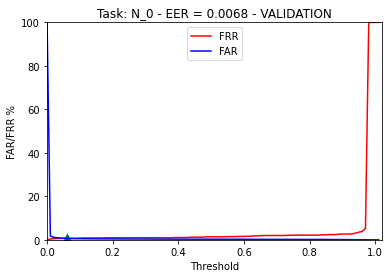

Task: N_0 - EER_interp: 0.6799999999999999% - Best Threshold: 0.05925486169435026
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.99      1.00     10831
    COMPLIANT       0.94      0.99      0.97      1169

     accuracy                           0.99     12000
    macro avg       0.97      0.99      0.98     12000
 weighted avg       0.99      0.99      0.99     12000

Confusion matrix ----------------------------------------
FAR: 0.66% | FRR: 0.6799999999999999% | EER_mean: 0.67% | TP: 1161 | TN: 10759 | FP: 72 | FN: 8
Accuracy ------------------------------------------------
Model Accuracy: 99.33%
---------------------------------------------------------
Task: N_1


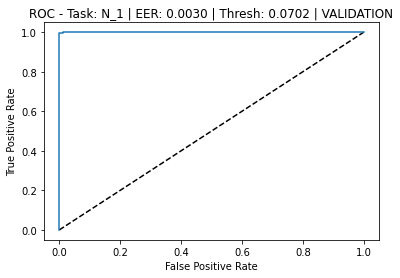

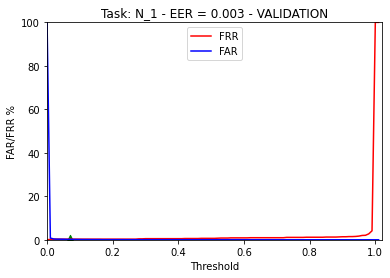

Task: N_1 - EER_interp: 0.3% - Best Threshold: 0.0701620183934715
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      1.00      1.00     10647
    COMPLIANT       0.98      1.00      0.99      1353

     accuracy                           1.00     12000
    macro avg       0.99      1.00      0.99     12000
 weighted avg       1.00      1.00      1.00     12000

Confusion matrix ----------------------------------------
FAR: 0.2% | FRR: 0.3% | EER_mean: 0.25% | TP: 1349 | TN: 10626 | FP: 21 | FN: 4
Accuracy ------------------------------------------------
Model Accuracy: 99.79%
---------------------------------------------------------
Task: N_2


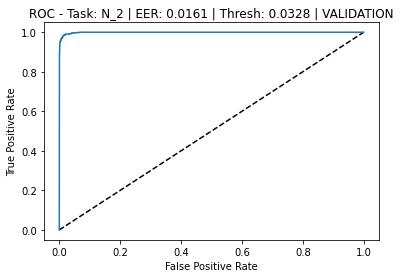

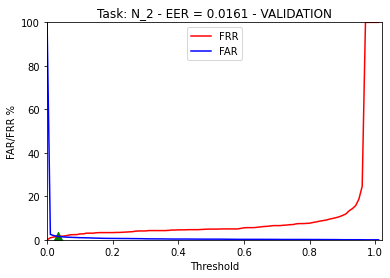

Task: N_2 - EER_interp: 1.6099999999999999% - Best Threshold: 0.032757023162957796
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.98      0.99     10820
    COMPLIANT       0.87      0.98      0.92      1180

     accuracy                           0.98     12000
    macro avg       0.93      0.98      0.96     12000
 weighted avg       0.99      0.98      0.98     12000

Confusion matrix ----------------------------------------
FAR: 1.6099999999999999% | FRR: 1.6099999999999999% | EER_mean: 1.6099999999999999% | TP: 1161 | TN: 10646 | FP: 174 | FN: 19
Accuracy ------------------------------------------------
Model Accuracy: 98.39%
---------------------------------------------------------
Task: N_3


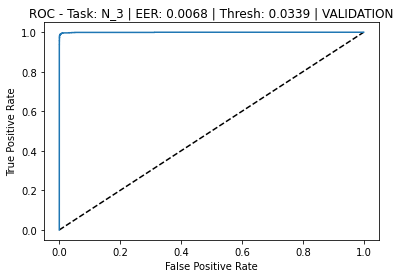

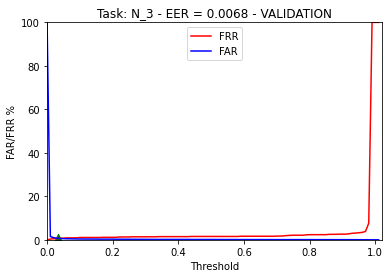

Task: N_3 - EER_interp: 0.6799999999999999% - Best Threshold: 0.033946279420381406
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.99      1.00     10770
    COMPLIANT       0.94      0.99      0.97      1230

     accuracy                           0.99     12000
    macro avg       0.97      0.99      0.98     12000
 weighted avg       0.99      0.99      0.99     12000

Confusion matrix ----------------------------------------
FAR: 0.6799999999999999% | FRR: 0.65% | EER_mean: 0.66% | TP: 1222 | TN: 10697 | FP: 73 | FN: 8
Accuracy ------------------------------------------------
Model Accuracy: 99.32%
---------------------------------------------------------
Task: N_4


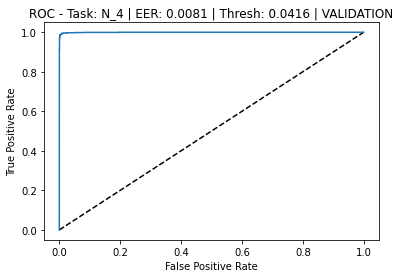

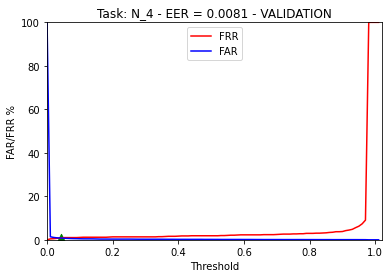

Task: N_4 - EER_interp: 0.8099999999999999% - Best Threshold: 0.0416480861619216
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.99      1.00     10818
    COMPLIANT       0.93      0.99      0.96      1182

     accuracy                           0.99     12000
    macro avg       0.96      0.99      0.98     12000
 weighted avg       0.99      0.99      0.99     12000

Confusion matrix ----------------------------------------
FAR: 0.8099999999999999% | FRR: 0.8500000000000001% | EER_mean: 0.83% | TP: 1172 | TN: 10730 | FP: 88 | FN: 10
Accuracy ------------------------------------------------
Model Accuracy: 99.18%
---------------------------------------------------------
Task: N_5


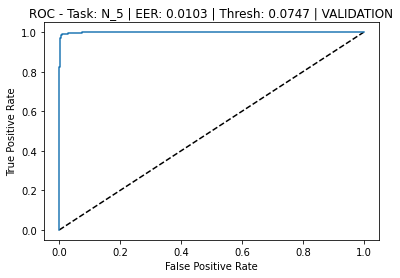

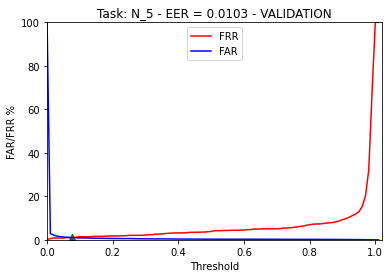

Task: N_5 - EER_interp: 1.03% - Best Threshold: 0.07467766329870021
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.99      0.99     10929
    COMPLIANT       0.90      0.99      0.94      1071

     accuracy                           0.99     12000
    macro avg       0.95      0.99      0.97     12000
 weighted avg       0.99      0.99      0.99     12000

Confusion matrix ----------------------------------------
FAR: 1.03% | FRR: 1.03% | EER_mean: 1.03% | TP: 1060 | TN: 10816 | FP: 113 | FN: 11
Accuracy ------------------------------------------------
Model Accuracy: 98.97%
---------------------------------------------------------
Task: N_6


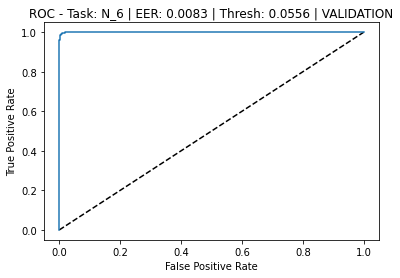

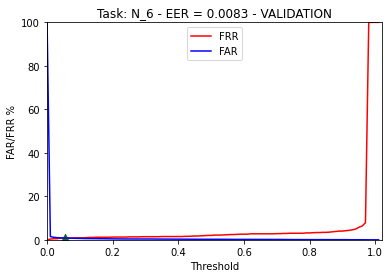

Task: N_6 - EER_interp: 0.83% - Best Threshold: 0.05562622848003313
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.99      1.00     10803
    COMPLIANT       0.93      0.99      0.96      1197

     accuracy                           0.99     12000
    macro avg       0.96      0.99      0.98     12000
 weighted avg       0.99      0.99      0.99     12000

Confusion matrix ----------------------------------------
FAR: 0.83% | FRR: 0.84% | EER_mean: 0.84% | TP: 1187 | TN: 10713 | FP: 90 | FN: 10
Accuracy ------------------------------------------------
Model Accuracy: 99.17%
---------------------------------------------------------
Task: N_7


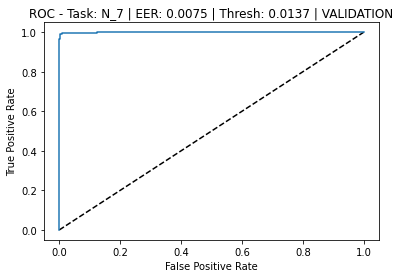

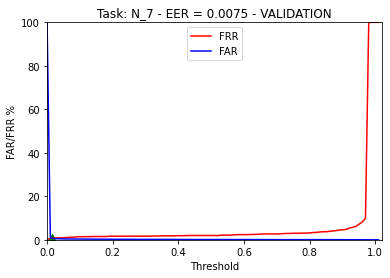

Task: N_7 - EER_interp: 0.75% - Best Threshold: 0.013675302264869554
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.99      1.00     10738
    COMPLIANT       0.94      0.99      0.97      1262

     accuracy                           0.99     12000
    macro avg       0.97      0.99      0.98     12000
 weighted avg       0.99      0.99      0.99     12000

Confusion matrix ----------------------------------------
FAR: 0.75% | FRR: 0.7100000000000001% | EER_mean: 0.73% | TP: 1253 | TN: 10658 | FP: 80 | FN: 9
Accuracy ------------------------------------------------
Model Accuracy: 99.26%
---------------------------------------------------------
Task: N_8


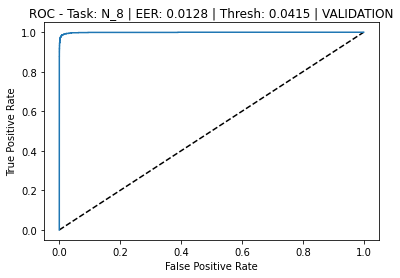

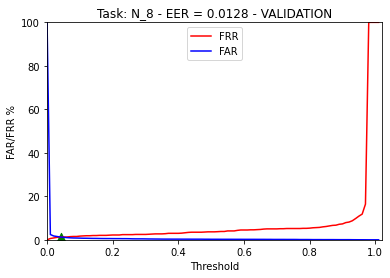

Task: N_8 - EER_interp: 1.28% - Best Threshold: 0.04152637022739228
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.99      0.99     10824
    COMPLIANT       0.90      0.99      0.94      1176

     accuracy                           0.99     12000
    macro avg       0.95      0.99      0.97     12000
 weighted avg       0.99      0.99      0.99     12000

Confusion matrix ----------------------------------------
FAR: 1.25% | FRR: 1.28% | EER_mean: 1.27% | TP: 1161 | TN: 10689 | FP: 135 | FN: 15
Accuracy ------------------------------------------------
Model Accuracy: 98.75%
---------------------------------------------------------
Task: N_9


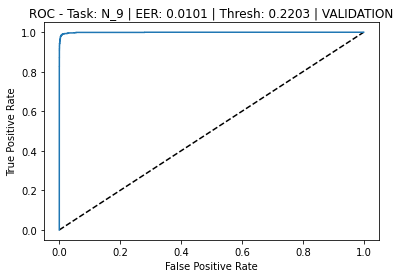

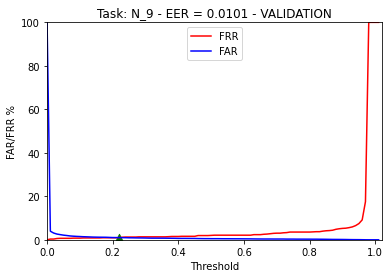

Task: N_9 - EER_interp: 1.01% - Best Threshold: 0.22032228120892502
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.99      0.99     10820
    COMPLIANT       0.91      0.99      0.95      1180

     accuracy                           0.99     12000
    macro avg       0.96      0.99      0.97     12000
 weighted avg       0.99      0.99      0.99     12000

Confusion matrix ----------------------------------------
FAR: 1.01% | FRR: 1.02% | EER_mean: 1.02% | TP: 1168 | TN: 10711 | FP: 109 | FN: 12
Accuracy ------------------------------------------------
Model Accuracy: 98.99%
---------------------------------------------------------
final_EER_mean: 0.89% | final_ACC: 99.12%


In [17]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model()

## Test Split

Testing Trained Model
Predicting labels....
313/313 [==============================] - 11s 36ms/step
Prediction finished!
Task: N_0


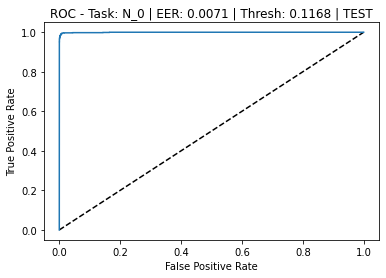

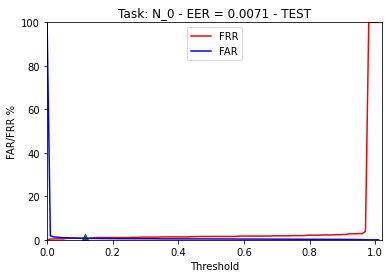

Task: N_0 - EER_interp: 0.7100000000000001% - Best Threshold: 0.11676494734627965
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.99      1.00      9020
    COMPLIANT       0.94      0.99      0.97       980

     accuracy                           0.99     10000
    macro avg       0.97      0.99      0.98     10000
 weighted avg       0.99      0.99      0.99     10000

Confusion matrix ----------------------------------------
FAR: 0.6799999999999999% | FRR: 0.7100000000000001% | EER_mean: 0.7000000000000001% | TP: 973 | TN: 8959 | FP: 61 | FN: 7
Accuracy ------------------------------------------------
Model Accuracy: 99.32%
---------------------------------------------------------
Task: N_1


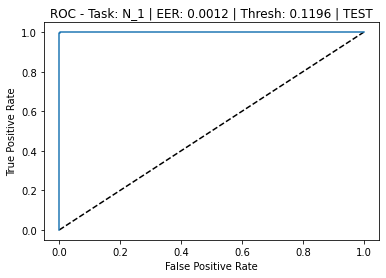

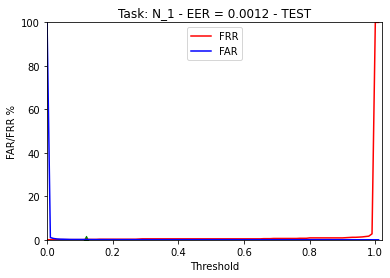

Task: N_1 - EER_interp: 0.12% - Best Threshold: 0.11958424001676954
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      1.00      1.00      8865
    COMPLIANT       0.99      1.00      0.99      1135

     accuracy                           1.00     10000
    macro avg       1.00      1.00      1.00     10000
 weighted avg       1.00      1.00      1.00     10000

Confusion matrix ----------------------------------------
FAR: 0.12% | FRR: 0.09% | EER_mean: 0.1% | TP: 1134 | TN: 8854 | FP: 11 | FN: 1
Accuracy ------------------------------------------------
Model Accuracy: 99.88%
---------------------------------------------------------
Task: N_2


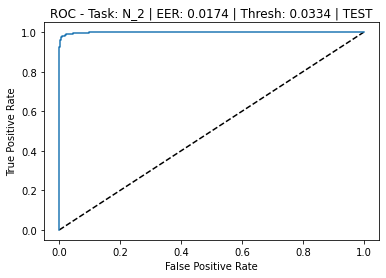

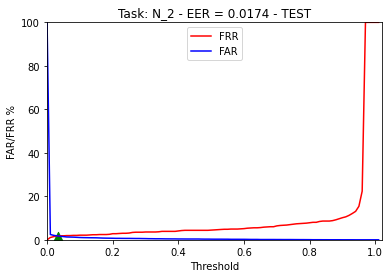

Task: N_2 - EER_interp: 1.7399999999999998% - Best Threshold: 0.03336452790710917
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.98      0.99      8968
    COMPLIANT       0.87      0.98      0.92      1032

     accuracy                           0.98     10000
    macro avg       0.93      0.98      0.96     10000
 weighted avg       0.98      0.98      0.98     10000

Confusion matrix ----------------------------------------
FAR: 1.7399999999999998% | FRR: 1.7399999999999998% | EER_mean: 1.7399999999999998% | TP: 1014 | TN: 8812 | FP: 156 | FN: 18
Accuracy ------------------------------------------------
Model Accuracy: 98.26%
---------------------------------------------------------
Task: N_3


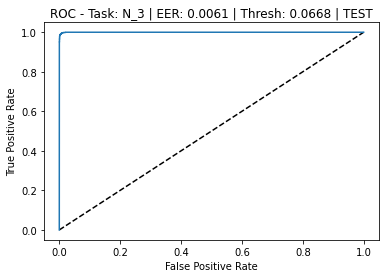

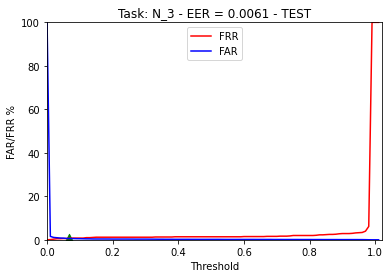

Task: N_3 - EER_interp: 0.61% - Best Threshold: 0.06677319853828095
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.99      1.00      8990
    COMPLIANT       0.95      0.99      0.97      1010

     accuracy                           0.99     10000
    macro avg       0.97      0.99      0.98     10000
 weighted avg       0.99      0.99      0.99     10000

Confusion matrix ----------------------------------------
FAR: 0.61% | FRR: 0.59% | EER_mean: 0.6% | TP: 1004 | TN: 8935 | FP: 55 | FN: 6
Accuracy ------------------------------------------------
Model Accuracy: 99.39%
---------------------------------------------------------
Task: N_4


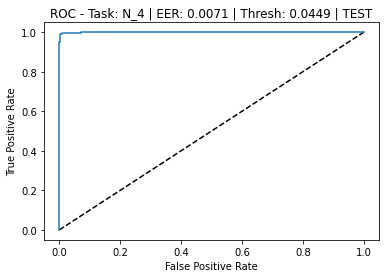

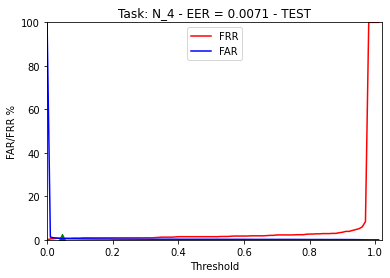

Task: N_4 - EER_interp: 0.7100000000000001% - Best Threshold: 0.044909148142410954
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.99      1.00      9018
    COMPLIANT       0.95      0.99      0.97       982

     accuracy                           0.99     10000
    macro avg       0.97      0.99      0.98     10000
 weighted avg       0.99      0.99      0.99     10000

Confusion matrix ----------------------------------------
FAR: 0.6% | FRR: 0.7100000000000001% | EER_mean: 0.66% | TP: 975 | TN: 8964 | FP: 54 | FN: 7
Accuracy ------------------------------------------------
Model Accuracy: 99.39%
---------------------------------------------------------
Task: N_5


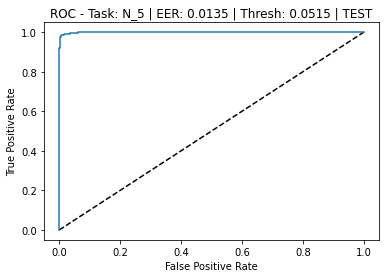

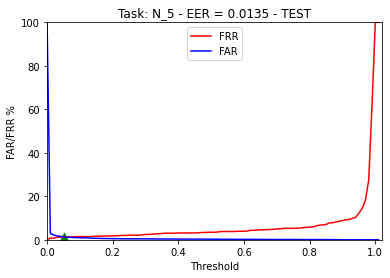

Task: N_5 - EER_interp: 1.35% - Best Threshold: 0.05151931839133231
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.99      0.99      9108
    COMPLIANT       0.88      0.99      0.93       892

     accuracy                           0.99     10000
    macro avg       0.94      0.99      0.96     10000
 weighted avg       0.99      0.99      0.99     10000

Confusion matrix ----------------------------------------
FAR: 1.31% | FRR: 1.35% | EER_mean: 1.3299999999999998% | TP: 880 | TN: 8989 | FP: 119 | FN: 12
Accuracy ------------------------------------------------
Model Accuracy: 98.69%
---------------------------------------------------------
Task: N_6


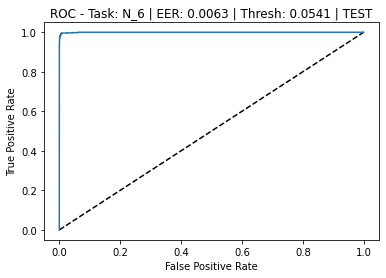

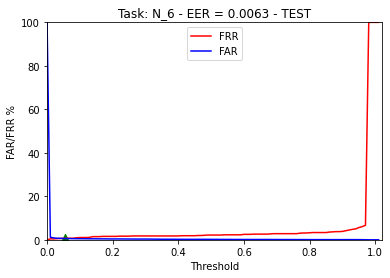

Task: N_6 - EER_interp: 0.63% - Best Threshold: 0.054097108534910024
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.99      1.00      9042
    COMPLIANT       0.94      0.99      0.97       958

     accuracy                           0.99     10000
    macro avg       0.97      0.99      0.98     10000
 weighted avg       0.99      0.99      0.99     10000

Confusion matrix ----------------------------------------
FAR: 0.63% | FRR: 0.63% | EER_mean: 0.63% | TP: 952 | TN: 8985 | FP: 57 | FN: 6
Accuracy ------------------------------------------------
Model Accuracy: 99.37%
---------------------------------------------------------
Task: N_7


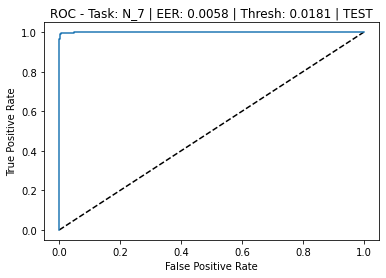

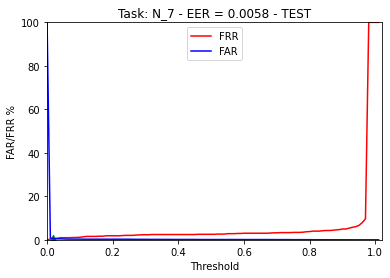

Task: N_7 - EER_interp: 0.58% - Best Threshold: 0.018133855464683397
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.99      1.00      8972
    COMPLIANT       0.95      0.99      0.97      1028

     accuracy                           0.99     10000
    macro avg       0.98      0.99      0.99     10000
 weighted avg       0.99      0.99      0.99     10000

Confusion matrix ----------------------------------------
FAR: 0.5599999999999999% | FRR: 0.58% | EER_mean: 0.5700000000000001% | TP: 1022 | TN: 8922 | FP: 50 | FN: 6
Accuracy ------------------------------------------------
Model Accuracy: 99.44%
---------------------------------------------------------
Task: N_8


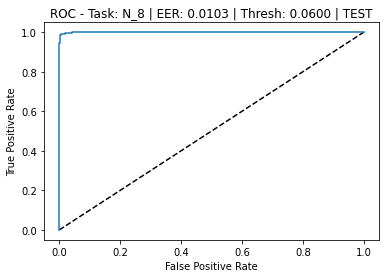

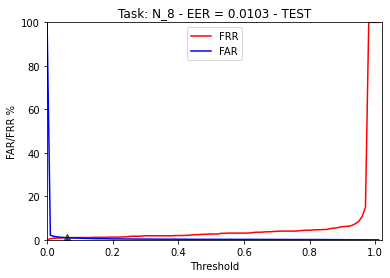

Task: N_8 - EER_interp: 1.03% - Best Threshold: 0.06000597204157107
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.99      0.99      9026
    COMPLIANT       0.92      0.99      0.95       974

     accuracy                           0.99     10000
    macro avg       0.96      0.99      0.97     10000
 weighted avg       0.99      0.99      0.99     10000

Confusion matrix ----------------------------------------
FAR: 0.97% | FRR: 1.03% | EER_mean: 1.0% | TP: 964 | TN: 8938 | FP: 88 | FN: 10
Accuracy ------------------------------------------------
Model Accuracy: 99.02%
---------------------------------------------------------
Task: N_9


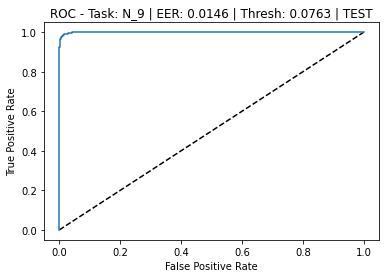

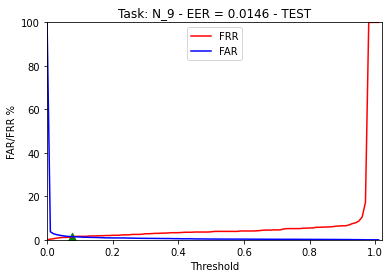

Task: N_9 - EER_interp: 1.46% - Best Threshold: 0.07630588859916435
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       1.00      0.99      0.99      8991
    COMPLIANT       0.88      0.99      0.93      1009

     accuracy                           0.99     10000
    macro avg       0.94      0.99      0.96     10000
 weighted avg       0.99      0.99      0.99     10000

Confusion matrix ----------------------------------------
FAR: 1.46% | FRR: 1.49% | EER_mean: 1.48% | TP: 994 | TN: 8860 | FP: 131 | FN: 15
Accuracy ------------------------------------------------
Model Accuracy: 98.54%
---------------------------------------------------------
final_EER_mean: 0.88% | final_ACC: 99.13%


In [18]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model()

# Visualize Model Classification

# Finishing Experiment Manager

In [19]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Finishing Neptune
